In [1]:
%reload_kedro

2023-05-06 16:45:58,767 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-05-06 16:45:59,323 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-05-06 16:45:59,498 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-05-06 16:45:59,499 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import seaborn as sns

## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-05-06 16:46:00,541 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

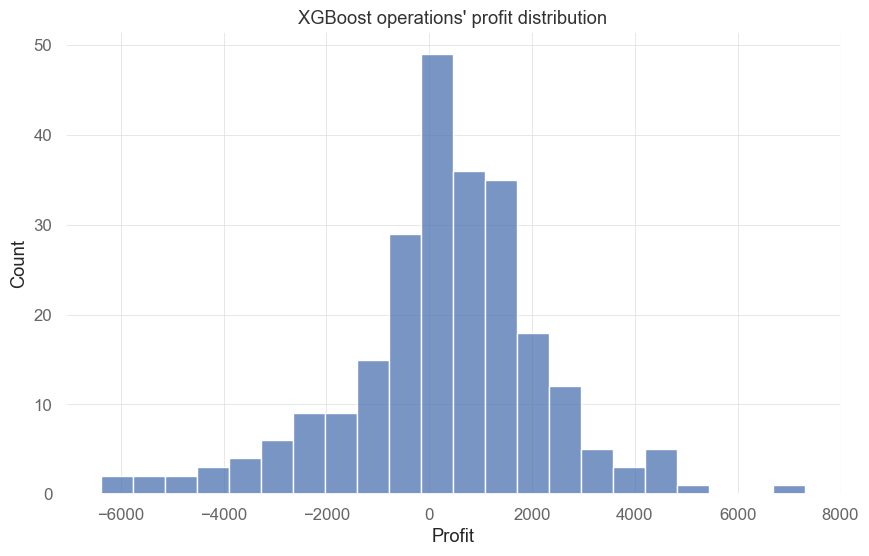

In [6]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="XGBoost operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_xgboost_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

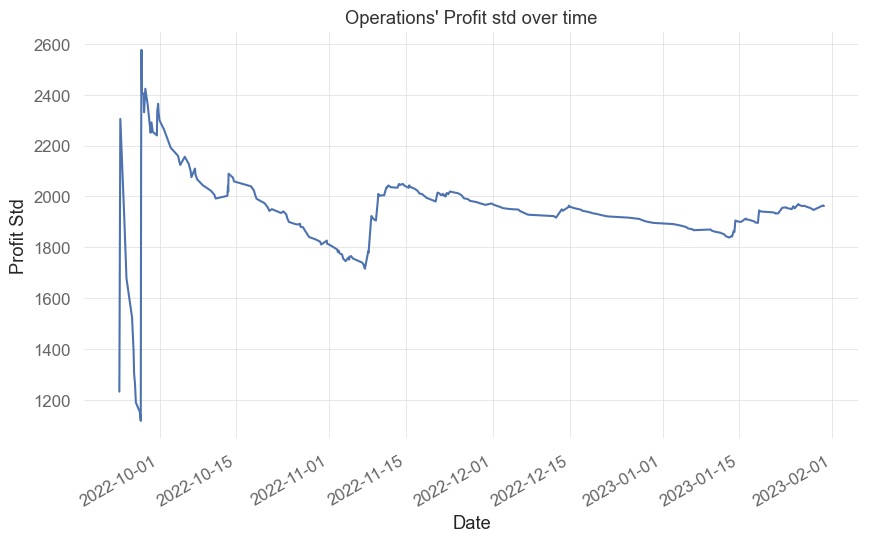

In [7]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

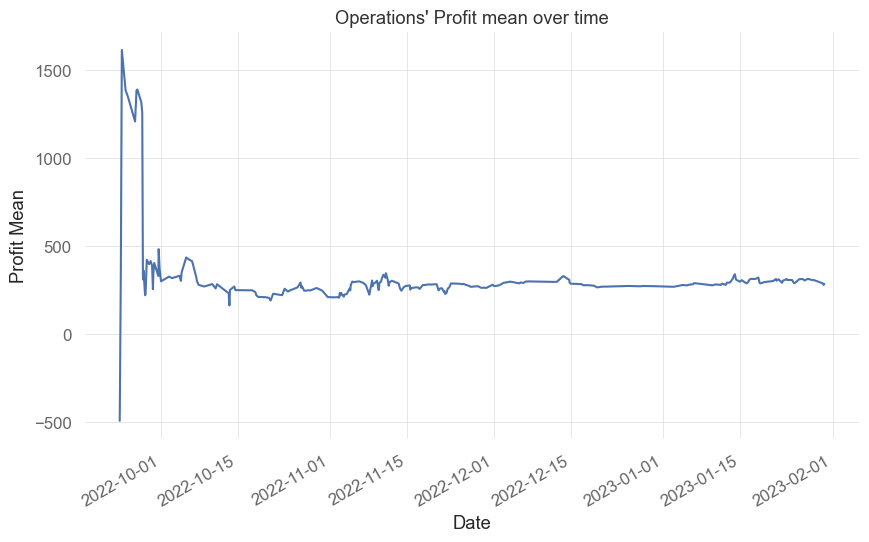

In [8]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [9]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-05-06 16:46:02,113 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [10]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

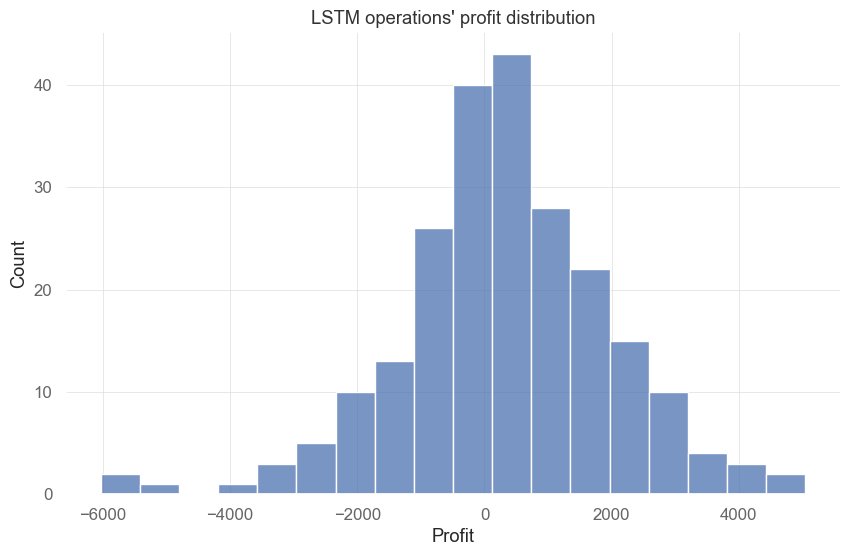

In [11]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LSTM operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_lstm_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

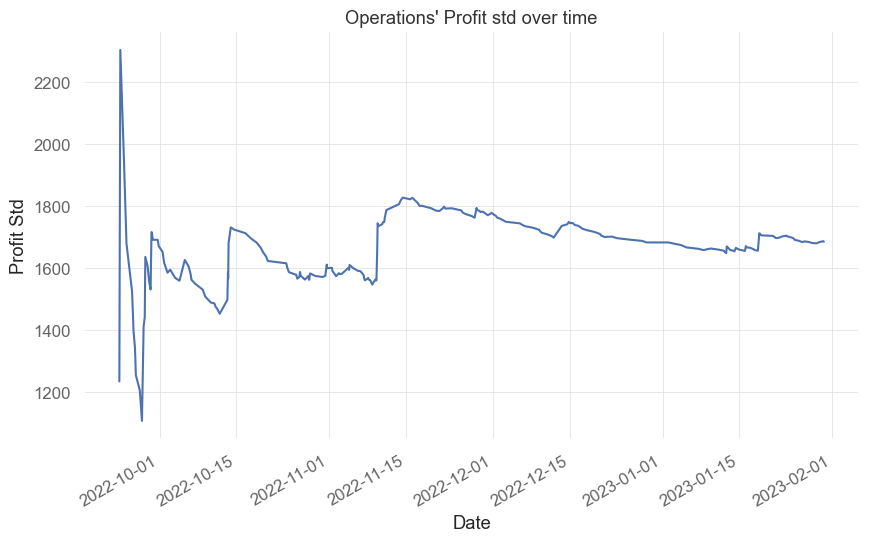

In [12]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

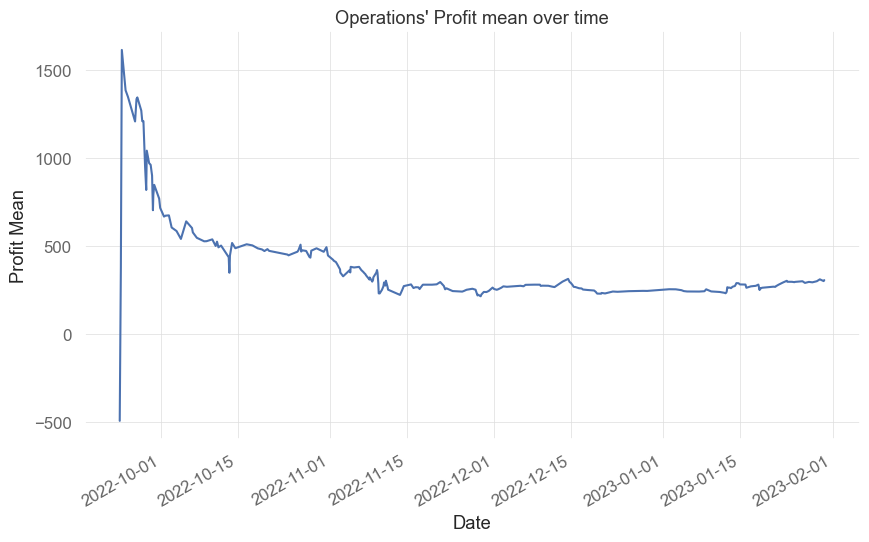

In [13]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [14]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-05-06 16:46:03,607 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [15]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

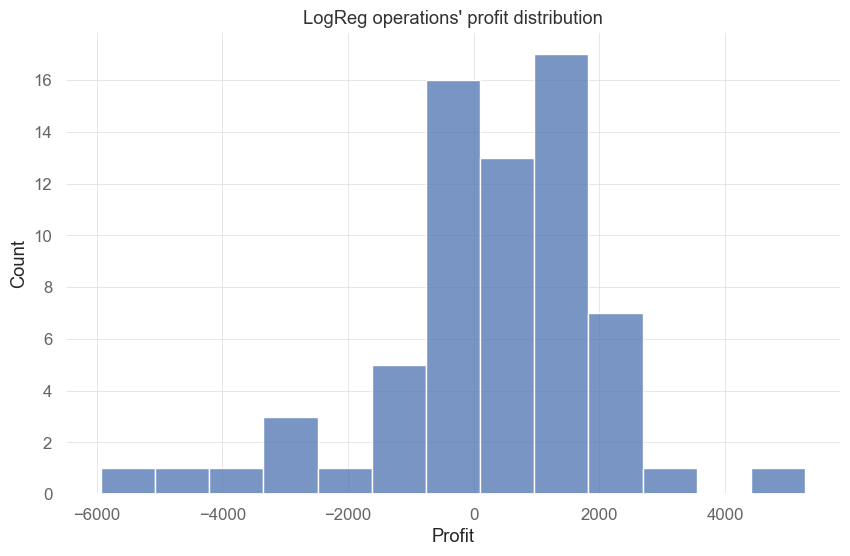

In [16]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LogReg operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_logreg_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

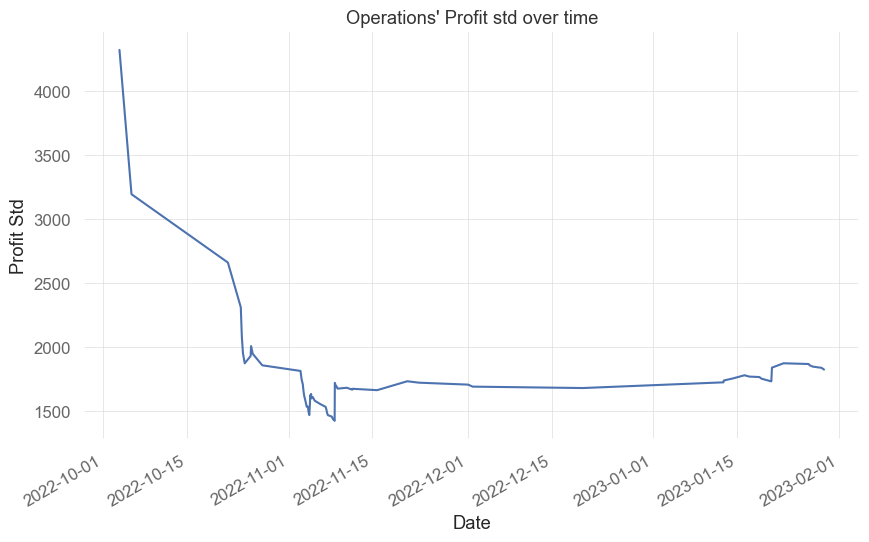

In [17]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

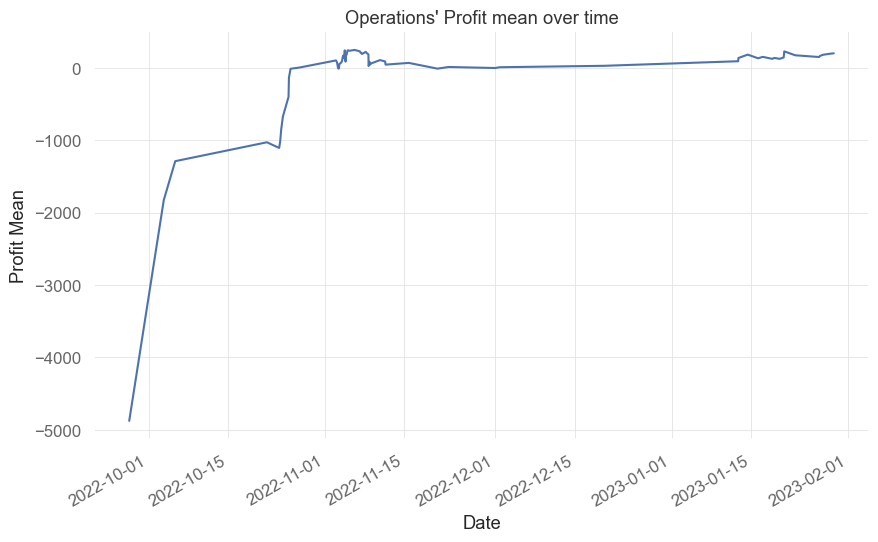

In [18]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## XGBoost

### Portfolio overall metrics - Part 1

In [19]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"
df_portf_metr

2023-05-06 16:46:04,874 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,70090.665923,11,5,xgboost


### Portfolio overall metrics - Part 2

In [20]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-06 16:46:04,890 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [21]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   46.73%
CAGR﹪              195.89%

Sharpe              2.87
Prob. Sharpe Ratio  98.99%
Sortino             4.34
Sortino/√2          3.07
Omega               1.52

Max Drawdown        -6.87%
Longest DD Days     27

Gain/Pain Ratio     1.18
Gain/Pain (1M)      -

Payoff Ratio        0.95
Profit Factor       1.52
Common Sense Ratio  1.59
CPC Index           0.89
Tail Ratio          1.05
Outlier Win Ratio   3.57
Outlier Loss Ratio  3.63

MTD                 9.8%
3M                  30.22%
6M                  46.73%
YTD                 9.8%
1Y                  46.73%
3Y (ann.)           195.89%
5Y (ann.)           195.89%
10Y (ann.)          195.89%
All-time (ann.)     195.89%

Avg. Drawdown       -2.04%
Avg. Drawdown Days  4
Recovery Factor     6.8
Ulcer Index         0.02
Serenity Index      5.58


In [22]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_xgboost_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'

## LSTM

### Portfolio overall metrics - Part 1

In [23]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"
df_portf_metr

2023-05-06 16:46:05,359 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,69976.525825,11,5,lstm


### Portfolio overall metrics - Part 2

In [24]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-06 16:46:05,373 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [25]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   46.65%
CAGR﹪              195.46%

Sharpe              3.53
Prob. Sharpe Ratio  99.7%
Sortino             5.65
Sortino/√2          4.0
Omega               1.66

Max Drawdown        -6.48%
Longest DD Days     28

Gain/Pain Ratio     1.34
Gain/Pain (1M)      -

Payoff Ratio        1.16
Profit Factor       1.66
Common Sense Ratio  2.15
CPC Index           1.13
Tail Ratio          1.3
Outlier Win Ratio   3.55
Outlier Loss Ratio  4.26

MTD                 13.97%
3M                  20.42%
6M                  46.65%
YTD                 13.97%
1Y                  46.65%
3Y (ann.)           195.46%
5Y (ann.)           195.46%
10Y (ann.)          195.46%
All-time (ann.)     195.46%

Avg. Drawdown       -1.42%
Avg. Drawdown Days  3
Recovery Factor     7.2
Ulcer Index         0.02
Serenity Index      5.43

In [26]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_lstm_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'

## LogReg

### Portfolio overall metrics - Part 1

In [27]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"
df_portf_metr

2023-05-06 16:46:05,747 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,13409.170977,7,4,LogReg


### Portfolio overall metrics - Part 2

In [28]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-06 16:46:05,762 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [29]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-27
End Period          2023-01-29
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   8.94%
CAGR﹪              28.93%

Sharpe              2.17
Prob. Sharpe Ratio  81.34%
Sortino             3.05
Sortino/√2          2.16
Omega               1.37

Max Drawdown        -5.24%
Longest DD Days     67

Gain/Pain Ratio     0.51
Gain/Pain (1M)      2.78

Payoff Ratio        0.92
Profit Factor       1.37
Common Sense Ratio  1.22
CPC Index           0.75
Tail Ratio          0.89
Outlier Win Ratio   3.05
Outlier Loss Ratio  3.76

MTD                 7.92%
3M                  8.9%
6M                  8.94%
YTD                 7.92%
1Y                  8.94%
3Y (ann.)           28.93%
5Y (ann.)           28.93%
10Y (ann.)          28.93%
All-time (ann.)     28.93%

Avg. Drawdown       -1.94%
Avg. Drawdown Days  12
Recovery Factor     1.7
Ulcer Index         0.02
Serenity Index      1.42


In [30]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_logreg_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'